In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [5]:
# Configuration
BATCH_SIZE = 32
IMG_SIZE = (224, 224) # Standard size for Transfer Learning models (ResNet, etc.)
DATA_DIR = 'data/classification_dataset' # Root folder name

# Define Transforms
# Training: Augmentation + Resize + Normalize
train_transforms = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.RandomHorizontalFlip(p=0.5), # Randomly flip 50% of images
    transforms.RandomRotation(15),          # Slight rotation (aerial objects aren't always straight)
    transforms.ToTensor(),                  # Convert image [0-255] to Tensor [0-1]
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # ImageNet Stats
])

# Validation/Test: Just Resize + Normalize (No random changes)
val_test_transforms = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [6]:
# Load Datasets
# ImageFolder expects structure: root/class_name/image.jpg
train_dataset = datasets.ImageFolder(os.path.join(DATA_DIR, 'train'), transform=train_transforms)
val_dataset   = datasets.ImageFolder(os.path.join(DATA_DIR, 'valid'), transform=val_test_transforms)
test_dataset  = datasets.ImageFolder(os.path.join(DATA_DIR, 'test'), transform=val_test_transforms)

# Create DataLoaders
# Shuffle=True for training to prevent order bias
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# 6. Print Summary
class_names = train_dataset.classes
print(f"Data Loaded Successfully")
print(f"   - Classes: {class_names}")
print(f"   - Train: {len(train_dataset)} images")
print(f"   - Val:   {len(val_dataset)} images")
print(f"   - Test:  {len(test_dataset)} images")

Data Loaded Successfully
   - Classes: ['bird', 'drone']
   - Train: 2662 images
   - Val:   442 images
   - Test:  216 images


Sample Training Batch:


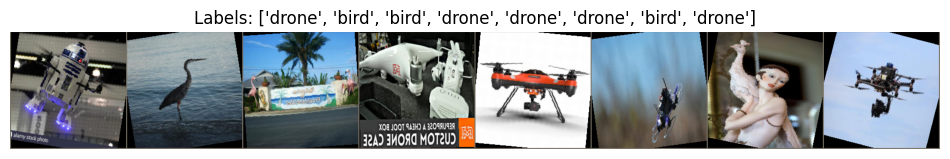

In [7]:
def imshow(img, title):
    """Helper function to un-normalize and display an image"""
    # Undo the normalization for visualization
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    img = img * std + mean
    img = torch.clamp(img, 0, 1)
    
    npimg = img.numpy()
    plt.figure(figsize=(12, 4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show the first 8 images
print("Sample Training Batch:")
grid_img = torchvision.utils.make_grid(images[:8], nrow=8)
label_names = [class_names[x] for x in labels[:8]]
imshow(grid_img, title=f"Labels: {label_names}")